# Redes Neurais

## Exemplo de implementação de Rede Neural

Entende-se por *DeepLearning* uma técnica de aprendizado de máquina que ensina o computador a realizar o que humanos fazem por natureza: Aprender por exemplo.

Redes Neurais são o estado da arte no que tange computação cognitiva nos dias atuais e suas aplicações dentro das ciências da computação vão desde carros autônomos aos identificadores de face.

Nós vamos entender como melhor como uma rede neural funciona quando abordado em computação cognitiva, mas para um breve resumo; Temos um conjunto de vetores de entrada, estes vetores tem seu valor original modificado pelas n camadas escondidas do modelo até que seu valor seja transformado em um vetor de saída.

![SVM01](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

Cada nó desta rede executa a soma de cada peso recebido por seus nós anteriores e tem sua multiplicação propagada por uma função de ativação:

![SVM02](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/2.jpg)

A estrutura tenta representar o que ocorre em um neurônio quando estimulado:

![SVM03](https://www.codeproject.com/KB/AI/1205732/neuron.png)

![SVM04](https://cdn-images-1.medium.com/max/2000/1*1Jr-Lt9vcEOW2opvZyLbdA.png)

Diferente dos modelos apresentados anteriormente, uma rede neural trabalha melhor com um número maior de features e pode precisar de um número muito maior de entradas de treino para convergir de maneira satisfatória.

In [35]:
from IPython.lib.display import YouTubeVideo

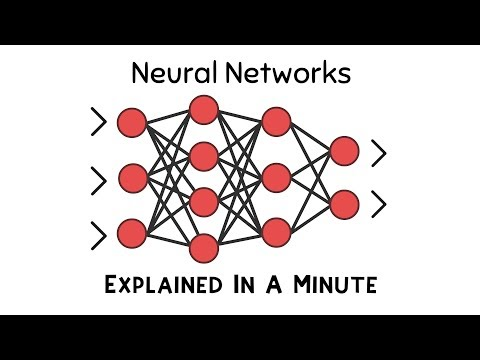

In [36]:
YouTubeVideo('rEDzUT3ymw4', width=720, height=560)

## Gerando uma base de dados para classificação

`make_classification` cria uma amostra randômica para estudos que envolvem classificação.

---

| Parâmetro | Descrição |
|--|--|
| n_samples | O número de amostras |
| n_features | O número de features |
| random_state | A semente utilizada para criar as amostras |


In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_classification, make_regression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_history(history):
    plt.figure(figsize = (15, 10))
    plt.plot(history.epoch, np.array(history.history['acc']), label='Train Acc')
    plt.plot(history.epoch, np.array(history.history['val_acc']), label = 'Val Acc')
    plt.title('model accuracy')
    plt.gca().set_ylim(top=1, bottom=0)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    plt.figure(figsize = (15, 10))
    plt.title('model loss')
    plt.gca().set_ylim(top=1, bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']), label = 'Val loss')
    plt.legend()
    plt.show()

In [ ]:
X, y = make_classification(n_samples=100000)

## Separando nossa informação em treino / teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

## Padronizando os dados

A padronização realiza a seguinte operação:
    
$$ 
X_i = \frac{X_i \times \overline{X}}{std_X}
$$

Basicamente o que estamos realizando é ignorar a distribuição original da nossa base. Transformaremos os dados para obter uma média muito próxima de 0 e desvio padrão próximo de 1, sendo assim não teremos valores com grande variância na nossa base.

In [ ]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Tensorflow

O [TensorFlow™](https://www.tensorflow.org/?hl=pt-br) é uma biblioteca de software de código aberto para computação numérica que usa gráficos de fluxo de dados.

[TensorFlow Playground](https://playground.tensorflow.org)

### Sequential()

`Sequential` é a classe que encapsula a lista de camadas que que dará forma ao modelo.

```python
model = Sequential()
model.add(Dense(32, input_shape = (500,)))
model.add(Dense(32))
```


### Dense

`Dense` é a classe que implementa uma camada do modelo.

---

| Parâmetro | Descrição |
|--|--|
| units | Dimensão da camada |
| activation | A função de ativação dos nós |
| input_shape | Dimensão dos inputs da rede |

### tensorflow.keras.models.Sequential.compile

Compila o modelo, geralmente recebe como parâmetro `loss`, `optimizer`, `metrics`.

---

| Parâmetro | Descrição |
|--|--|
| loss | Função considerada para cálculo do erro de saída do modelo |
| optimizer | Função utilizada para otimizar o modelo |
| metrics | Lista de métricas utilizadas para medir o desempenho do modelo durante o treino e teste |

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(20, input_dim=20, activation=tf.nn.relu))
    model.add(keras.layers.Dense(40, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
model = build_model()
model.summary()

- Layer (type) - Retorna nome da camada e tipo
- Output Shape - Retorna dimensão do vetor
- Param # - Retorna a o resultado de $inputs \times nós + bias $

Ex. $20 \times 20 + 20 = 420$

## Como identificar Overfitting e Underfitting?

Overfiting e Underfitting são o caso de resultados ruins em modelos de inteligência artificial.

Podemos classificar como:

- **Underfitting**
 - O modelo tem resultados ruins com a parcela de treino e validação, ou seja, o modelo não é capaz de entregar o resultado esperado por causa de sua arquitetura ou da qualidade da informação que lhe é apresentada.
 

- **Overfitting**
 - O modelo tem resultados excelentes com sua parcela de treinamento, mas é incapaz de reproduzir os mesmos resultados com a parcela de validação.
 
 ![PIC2](https://shapeofdata.files.wordpress.com/2013/02/overfitting.png)

#### Underfitting

- Quando verificamos que o erro da parcela de treino é menor que a de validação e existe uma tendência de queda na parcela de validação, ou seja, esse valor de erro pode melhorar com um número maior de épocas.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model.png)

- Outro exemplo é quando temos um comportamento parecido entre a curva de treino e validação, porém, temos uma variação no erro entre estas curvas. Esse comportamento pode ser causado por um *underfit* da rede e, neste caso, pode ser corrigido modificando a estrutura da rede.


 ![PIC4](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model-via-Status.png)

#### Overfitting

- Quando verificamos que o erro da parcela de treino melhora quanto maior é o número de épocas, porém, a parcela de validação tem um comportamento completamente oposto ou vemos este erro diminuir até um determinado ponto e depois degradar.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Overfit-Model.png)

Podemos combater o *overfit* da rede adicionando uma regularização dos peso do modelo ou uma política de dropout.

#### Regularização de peso

- **L1 regularization**
 - O custo adicionado é proporcional a soma dos valores absolutos dos pesos.

- **L2 regularization**
 - O custo adicionado é proporcional a soma dos valores quadráticos dos pesos.
 
Em poucas palavras, L1 tem o mesmo efeito de reduzir o número de inputs da rede, fazendo com que inputs que tem peso pequeno se aproximem de zero e reduzindo o ruído causado. L2 resulta valores de peso geral menores e estabiliza os pesos quando há alta correlação entre os recursos de entrada.

#### Dropout

Dropout se resume em, aleatoriamente, desligar conexões entre os nós de duas camadas. Diminuindo assim a complexidade da arquitetura da rede.

 ![PIC3](https://cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png)



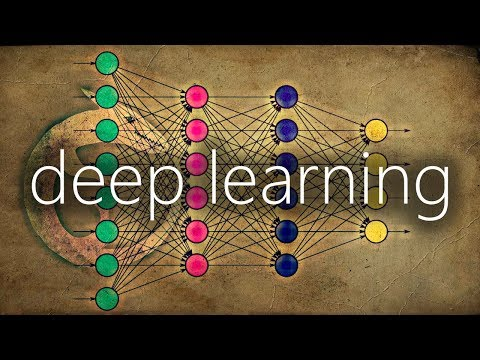

In [38]:
YouTubeVideo('DEMmkFC6IGM', width = 720, height = 560)

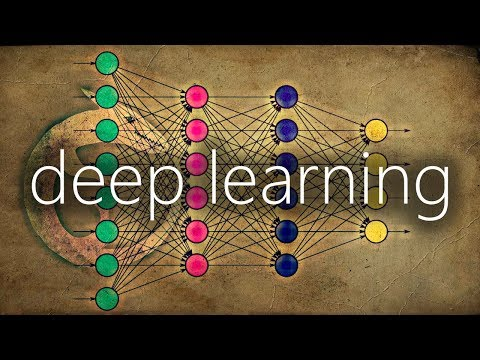

In [37]:
YouTubeVideo('0h8lAm5Ki5g', width = 720, height = 560)

In [ ]:
history = model.fit(X_train, y_train, epochs=250, validation_split=0.2, verbose=True)
plot_history(history)

In [ ]:
[loss, acc] = model.evaluate(X_test, y_test)
print("Acc: {:.4f}".format(acc))

In [ ]:
pred_output = model.predict(X_test)
pred_output = (pred_output > 0.5)

In [ ]:
test_preds = model.predict(X_test).flatten()
test_preds_bin = (test_preds > 0.5)
test_preds_bin

In [ ]:
cm  = confusion_matrix(y_test, test_preds_bin)
sns.heatmap(cm, annot = True, fmt='g', cmap = 'winter')

## Curva ROC

A Curva de operação do receptor (*Receiver Operationg Characteristic*)  é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário e como o seu limiar de discriminação é variado. [Wikipedia](https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor)

 ![PIC6](https://ncss-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/ROC-Curves-Empirical-19.png)

#### Sensitivity

Também chamada de *true positive rate*, *recall* ou *probabilidade de detecção*. Mede a proporção de positivos realmente detectados como positivos.

$$
TPR = \frac{TP}{TP + FN}
$$

#### Specificity

Também chamada de *true negative rate*, mede a proporção de negativos realmente detectados como negativos.

$$
TNR = \frac{TN}{TN + FP}
$$

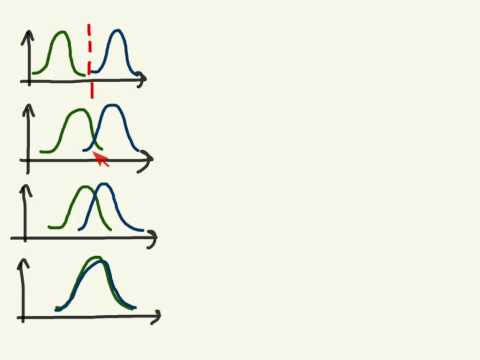

In [39]:
YouTubeVideo('21Igj5Pr6u4', width = 720, height = 560)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
auc_calc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(fpr, tpr, label='Modelo (area = {:.3f})'.format(auc_calc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.plot([0, 1], [0, 1], 'k--')

## Exercício 1

Dado o problema apresentado na aula passada, tente modelar uma rede para realizar a mesma classificação para o caso de diabetes.

Compare os valores obtidos.

Ao separar as bases em teste e treino, garanta que exatamente 20% seja reservado para a parcela de teste e utilize um random_state igual a 42 como demonstrado abaixo:

```
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
```

In [ ]:
import pandas as pd

In [ ]:
data_diabetes = pd.read_csv('https://raw.githubusercontent.com/pgiaeinstein/otmz-mlp/master/diabetes.csv', sep=',')

In [ ]:
data_diabetes.head()

In [ ]:
# Resolução






# Lab 01

## Introdução

O objetivo deste laboratório é explorar diferentes técnicas utilizadas para classificação em aprendizado de máquina, utilizaremos modelos clássicos de classificação e iremos introduzir um modelo simples de rede neural para resolver o mesmo problema.

O intuito desta atividade é a familiarização das bibliotecas em Python utilizadas por padrão na análise de dados assim como mostrar que o aprendizado de máquina é algo simples e acessível a qualquer um.

## Sobre o DataSet

Para este laboratório, vamos brincar com o dataset [Breast Cancer Wisconsin](http://mlr.cs.umass.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

Este dataset é público e foi disponibilizado em novembro de 1995, o objetivo é classificar tumores como benignos ou malignos considerando valores obtidos por análise de imagem.

Mais informações sobre este dataset e seus valores podem ser consultadas [neste link](http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names).

## Bibliotecas utilizadas

### NumPy

[NumPy](http://www.numpy.org/) é uma famosa biblioteca utilizada para fins científicos, facilita a criação, manipulação e cálculos envolvendo vetores e matrizes.

### Pandas

[Pandas](https://pandas.pydata.org/) provê uma interface que nos permite manipular dados de forma similar ao que faríamos utilizando uma tabela de Excel. Nos devolve uma estrutura de dados chamada [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), onde organizamos os dados em linhas e colunas.

### MatPlotLib

[MatPlotLib](https://matplotlib.org/) é uma biblioteca para plotagem de gráficos. Suas ferramentas permitem customização completa dos gráficos gerados.

### Seaborn

[Seaborn](https://seaborn.pydata.org/) provê uma camada _high-level_ de abstração para a utilização da biblioteca Matplotlib, ou seja, é um facilitador.

### Scikit-Learn

[Scikit-Learn](http://scikit-learn.org/stable/) é uma das principais bibliotecas utilizadas para machine learning em Python, é open source e mantida por diversas instituições de ensino.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Importando os dados para uma estrutura de DataFrame

A biblioteca Pandas possui métodos facilitadores para a importação de vários tipos de fontes de dados em um DataFrame. Neste laboratório vamos utilizar um arquivo no formato csv ([**C**omma-**S**eparated **V**alues](https://pt.wikipedia.org/wiki/Comma-separated_values)).

Para ter uma visão de todos os facilitadores de importação como quais parâmetros de formatação podemos utilizar para importar estes dados, veja a [documentação da biblioteca](https://pandas.pydata.org/pandas-docs/stable/io.html).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pgiaeinstein/otmz-mlp/master/bcw.data.csv', sep=',')
df

Veja que quando imprimo o dataframe completo ele me mostra uma quantidade de 60 itens sendo os 30 primeiros e os 30 últimos da coleção.

Essa forma de visualizar nem sempre é necessária e pode poluir nossa documentação. Para uma visão mais controlada do Dataframe, podemos utilizar o método [`head()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) que imprime, por padrão, as primeiras 5 linhas de informação.

In [ ]:
df.head()

O método aceita como argumento principal o número de linhas que desejamos imprimir, veja no exemplo abaixo quando solicitamos que as 32 linhas iniciais sejam impressas em nosso documento.

In [ ]:
df.head(32)

### Modificando o dataframe

Para uma análise inicial dos dados, outro método interessante é o [`info()`](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.info.html), este método imprime um resumo quantitativo e qualitativo além da estrutura completa de nosso Dataframe.

In [ ]:
df.info()

Vamos entender o que é impresso acima:

Temos 569 linhas de informação neste dataframe, iniciando no índice 0 até o índice 568. Nestas 569 entradas temos 33 atributos por linha, ou seja, temos 33 colunas.

Verifique que o método sumariza para cada linha, o nome de sua coluna, o total de valores não nulos nesta coluna assim como também o tipo de dado que a coluna guarda.

Repare na coluna `Unnamed: 32`; Está coluna possui 0 valores não nulos, ou seja, todos os valores desta coluna são nulos e devem ser desconsiderados pois não nos ajuda em nada neste laboratório.

Além da coluna `Unnamed: 32`, este dataframe possui outra coluna `id` que não faz sentido para este laboratório.

Por último, temos um resumo dos tipos de dados presentes no dataframe e também qual o tamanho em memória ocupado por este dataframe.

O método [`drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) permite eliminar colunas ou linhas do nosso dataframe, no caso, vamos remover as colunas `Unnamed: 32` e `id` como dito acima e utilizaremos o argumento `inplace = True` para modificar o objeto em que estamos utilizando o método.

Por segurança, vamos criar uma cópia do objeto original e salvaremos na variável `df_inicial`.

In [ ]:
# vou criar uma cópia do dataframe inicial por segurança
df_inicial = df

# vamos remover as colunas
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)
df.head()

Reparem na coluna `diagnosis`, esta coluna é chamada de *TARGET*, ou seja, é a nossa coluna de saída para nosso modelo de classificação.

Ela possui dois valores em formato `char` (**M** e **B**), para facilitar nossa vida, vamos modificar essa variável para um valor numérico.

Criaremos um dicionário auxiliar para o método [`map()`](http://book.pythontips.com/en/latest/map_filter.html) onde vamos classificar a letra **B** (Benigno) como **0** e a letra **M** (Maligno) como **1**.

In [ ]:
label = {
    'B' : 0,
    'M' : 1
}

df['diagnosis'] = df['diagnosis'].map(label)
df

Depois desta transformação, agora nossa coluna de saída possui valores numéricos distintos (0 e 1).

Vamos analisar de forma mais estatística nosso dataframe agora, para isso, utilizamos o método [`describe()`](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.describe.html).

Este método retorna um resumo estatístico de nosso dataframe, por coluna, desconsiderando valores nulos.

In [ ]:
df.describe()

### Escolhendo nossas Features

Temos 3 tipos de medidas neste dataset: Mean, SE e Worst. É importante entender como estes valores se comunicam.

Para alguns modelos clássicos utilizados em aprendizado de máquina, temos problemas quanto maior for o número de entradas e de colunas, característica esta que é o inverso quando comparada a um modelo de rede neural, por exemplo.

Entendendo isso vamos escolher variáveis de *input* que beneficiem nossa tarefá de classificação, sem utilizar nenhum modelo auxiliar para selecionar estas variáveis.

Separamos então nossas colunas em 3 tipos distintos: Mean, SE e Worst. Após essa separação, vamos analisar cada grupo buscando possíveis correlações entre estas variáveis.

In [ ]:
# vamos criar um dataframe excluindo a coluna 'diagnosis':
df_parcial = df.iloc[:, 1:]
df_parcial.head()

In [ ]:
# Neste novo dataframe, vamos listar as colunas que restaram:
df_parcial.columns

Verifiquem que os 3 grupos de medidas estão em ordem, temos então levando como base o array acima:

#### Variáveis do tipo MEAN:
> Posição 0 até posição 9 do array.

#### Variáveis do tipo SE:
> Posição 10 até posição 19 do array.

#### Variáveis do tipo WORST:
> Posição 20 até posição 29 do array.

Vamos separar nossas features por tipo, criando listas com as colunas de interesse para cada tipo de variável.

In [ ]:
f_mean  = list(df_parcial.columns[:10])
f_se    = list(df_parcial.columns[10:20])
f_worst = list(df_parcial.columns[20:])

In [ ]:
f_mean

In [ ]:
f_se

In [ ]:
f_worst

Outro aspecto importante que devemos sempre levar em consideração é como as colunas se correlacionam, uma correlação forte entre variáveis tende a divergir o resultado do modelo em alguns casos.

Agora vamos obter a matriz de correlação destas variáveis.

In [ ]:
correlacao = df_parcial[f_mean].corr()
correlacao

Lembrando que quanto maior a proximidade do valor entre 1 e -1, maior é a correlação entre as duas colunas para facilitar a visualização desta matriz, algo que é muito utilizado é um gráfico do tipo HeatMap.

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlacao, xticklabels = f_mean, yticklabels= f_mean, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={ 'size' : 15}, cmap = 'winter', ax = ax)

#### Interpretando o gráfico

As observações aqui são simples, vamos remover de nossa base, todos os campos que tem forte correlação!

Verifique que existem 2 "quadrados" onde é possível verificar forte correlação entre os campos: `radius_mean`, `perimeter_mean` e `area_mean` formam o primeiro "quadrado" e os campos `compactness_mean`, `concavity_mean` e `concavepoint_mean` formam o segundo.

Destes dois conjuntos, escolhemos um de cada e seguimos com nossa analise.

Do primeiro grupo, vemos que `area_mean` tem os menores valores de correlação com as demais colunas, vamos escolher esta *feature* neste conjunto.

Do segundo conjunto, vemos que `compactness_mean` tem os menores valores, então seguiremos com ele.

Nossa lista de colunas final será:

In [ ]:
features_mean = ['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

#### Criando dataframes separados entre features e meta

Como já temos nossas features iniciais, podemos agora criar dois vetores, um com nossas *features* escolhidas e outro chamado de *target*, ou seja, com a classificação para cada linha de nosso dataset.

In [ ]:
features = df[features_mean]
features.head()

In [ ]:
target = df['diagnosis']
target.head()

#### Separando nossa amostra em treino e teste

Vamos separar agora a nossa base entre uma base de treino e uma base de teste.

In [ ]:
seed = 4

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = seed)

Vamos criar duas funções que irão nos auxiliar com o treino, a predição e a exibição dos resultados de nossas predições.

In [ ]:
def calcula_resultados(pred_output, real_output):
    cm  = confusion_matrix(real_output, pred_output)
    acc = accuracy_score(real_output, pred_output)
    f1  = f1_score(real_output, pred_output)
    ps  = precision_score(real_output, pred_output)
    rs  = recall_score(real_output, pred_output)
    
    return {
        'matrix'   : cm,
        'accuracy' : acc,
        'f1'       : f1,
        'ps'       : ps,
        'rs'       : rs
    }

def testa_modelo(modelo, X_train, X_test, Y_train, Y_test):
    modelo.fit(X_train, Y_train)
    pred_output = modelo.predict(X_test)
    response = calcula_resultados(pred_output, Y_test)
    
    print('-----------------------------')
    print('Accuracy : {}'.format(response['accuracy']))
    print('F1 : {}'.format(response['f1']))
    print('Precision : {}'.format(response['ps']))
    print('Recall : {}'.format(response['rs']))
    print('-----------------------------')
    sns.heatmap(response['matrix'], annot = True, cmap = 'winter')

### Modelos

#### SVM (Support Vector Machine)

Uma [**SVM**](https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte) é um excelente método para se testar em primeiro lugar quando não se tem nenhum conhecimento prévio sobre um domínio. Três propriedades tornam a SVM atraente:

1. Constroem um **separador de margem máxima**:

![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/svm01.jpg)
![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/svm02.png)

2. Criam uma separação linear em hiperplano, mas tem a capacidade de entender dados em um espaço de dimensão superior, usando o **truque de kernel**.

![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/svm03.png)

3. Uma SVM é **não paramétrica**, ou seja, existe a necessidade em guardar os exemplos de treinamento. Porém, na prática, acabam guardando apenas uma **pequena fração do número de exemplos**.

![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/svm04.png)

In [ ]:
svc_model = SVC()
testa_modelo(svc_model, X_train, X_test, Y_train, Y_test)

#### Padronização dos dados

Já discutimos que alguns algoritmos sofrem com dados em escalas que divergem muito, vamos ver este conceito na prática.

Reparem na distribuição de nossas features atualmente:

In [ ]:
X_train.describe()

A padronização realiza a seguinte operação:
    
$$ 
X_i = \frac{X_i \times \overline{X}}{std_X}
$$

Basicamente o que estamos realizando é ignorar a distribuição original da nossa base. Transformaremos os dados para obter uma média muito próxima de 0 e desvio padrão próximo de 1, sendo assim não teremos valores com grande variância na nossa base.

In [ ]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler_df.describe()

In [ ]:
testa_modelo(svc_model, X_train_scaler, X_test_scaler, Y_train, Y_test)

#### Árvore de Decisão

Uma **Árvore de Decisão** representa uma função que recebe em seus parâmetros de entrada um vetor de valores e retorna uma resposta / classificação.

![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/DT01.png)

Uma árvore alcança sua resposta executando uma sequência de testes onde cada nó interno de sua estrutura corresponde a um teste do valor e de um dos atributos de entrada.

In [ ]:
random_state = 0

DT_model = DecisionTreeClassifier(random_state = random_state)
testa_modelo(DT_model, X_train, X_test, Y_train, Y_test)

In [ ]:
testa_modelo(DT_model, X_train_scaler, X_test_scaler, Y_train, Y_test)

#### kNN (K Nearest-Neighbor)

O **kNN** ([k-Vizinhos Mais Próximos](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)) é um algoritmo não linear que literalmente mede a distância de um determinado ponto sem classificação em relação a k pontos conhecidos.

A classificação deste ponto então se dá pelo maior número de similares dentre os k vizinhos mais próximos analisados:

![SVM01](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/knn01.png)

A distância pode ser calculada de vários modos, o mais comum é utilizar a distância euclidiana, que respeita a seguinte equação:

$$
D_{A,B} = \sqrt{(A_1 - B_2)^2+(A_2 - B_2)^2+\ldots+(B_n - B_n)^2}
$$

In [ ]:
knn_model = KNeighborsClassifier()
testa_modelo(knn_model, X_train, X_test, Y_train, Y_test)

In [ ]:
testa_modelo(knn_model, X_train_scaler, X_test_scaler, Y_train, Y_test)

Novamente vemos um resultado melhor quando utilizamos os dados padronizados.

## Exercício 2

Crie uma rede neural para classificar o problema proposto no **Lab01**, compare os valores obtidos anteriormente com o melhor valor encontrado em sua rede.

In [ ]:
# Resolução





### Exercício 3

In [ ]:
data_ns = pd.read_csv('https://raw.githubusercontent.com/pgiaeinstein/otmz-mlp/master/base_ns.csv', sep=',')

In [ ]:
data_ns.head()